In [1]:
suppressMessages(source("../config_sing.R"))

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_zoom1.csv"
fpath = file.path(fdiry, fname)

dat_astarr = read_csv(fpath)
head(dat_astarr)

Rows: 120000 Columns: 281
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): Sample, Fragment, Chrom
dbl (278): Count, Start, End, Loc, Pct_GC, Input, Output, Log2fc, Mtf_FOX/1,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,⋯,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Output_rep1,1,chrX_48780151_48780425,chrX,48780151,48780425,48780288,0.405109,-13.57518,-14.43469,⋯,0,0,0,0,0,0,0,0,0,0
Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.75205,-13.42351,⋯,0,0,0,0,0,0,0,0,0,0
Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.75205,-13.42351,⋯,0,0,0,0,0,0,0,0,0,0
Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.75205,-13.42351,⋯,0,0,0,0,0,0,0,0,0,0
Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.75205,-13.42351,⋯,0,0,0,0,0,0,0,0,0,0
Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.75205,-13.42351,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
fdiry = file.path(FD_RES, "regulatory_landscape")
fname = "dat_output_TileMPRA_zoom1.csv"
fpath = file.path(fdiry, fname)

dat_tmpra = read_csv(fpath)
head(dat_tmpra)

Rows: 10000 Columns: 281
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): Fragment, Chrom
dbl (279): Start, End, Loc, Pct_GC, Input, Output, Log2fc, Mtf_GRHL, Mtf_Ebo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_GRHL,⋯,Mtf_CREB/ATF/3,Mtf_ZNF435,Mtf_HD/19,Mtf_MYB/1,Mtf_ZBED1,Mtf_ARI5B,Mtf_HINFP1/2,Mtf_MYB/4,Mtf_GMEB2/1,Mtf_HINFP1/3
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47786601_47786800,chrX,47786601,47786800,47786701,0.346734,2102.91634,2202.38455,0.06670014,7.9452,⋯,0,0,0,0,0,0,0,0,0,0
chrX_47787901_47788100,chrX,47787901,47788100,47788001,0.427136,861.23563,1065.59016,0.30584747,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
chrX_47788551_47788750,chrX,47788551,47788750,47788651,0.422111,64.68709,78.17204,0.27984474,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
chrX_47788951_47789150,chrX,47788951,47789150,47789051,0.577889,664.32771,2001.70856,1.59055309,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
chrX_47789101_47789300,chrX,47789101,47789300,47789201,0.608040,749.68227,38769.99456,5.69243887,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
chrX_47789101_47789300,chrX,47789101,47789300,47789201,0.608040,749.68227,38769.99456,5.69243887,0.0000,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra 
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% group_by(group) %>% summarize(Val = n()) %>% na.omit
df2 = df2 %>% group_by(group) %>% summarize(Val = n()) %>% na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### show results
cat("Tiling MPRA", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("ASTARR", dim(df2), "\n")
print(head(df2, 3))

Tiling MPRA 446 3 
# A tibble: 3 × 3
      Left    Right   Val
     <int>    <int> <int>
1 48780100 48780200    51
2 48780200 48780300    13
3 48780300 48780400    44

ASTARR 137 3 
# A tibble: 3 × 3
      Left    Right   Val
     <int>    <int> <int>
1 48780200 48780300     1
2 48780500 48780600     1
3 48781700 48781800     1


In [5]:
### create figure
dat = df1
gp1 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
    labs(y="Count", title="ATAC-STARR-seq") +
    theme_cowplot()

In [6]:
### create figure
dat = df2
gp2 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Val)) +
labs(y="Count", title="Tiling MPRA") +
    theme_cowplot()

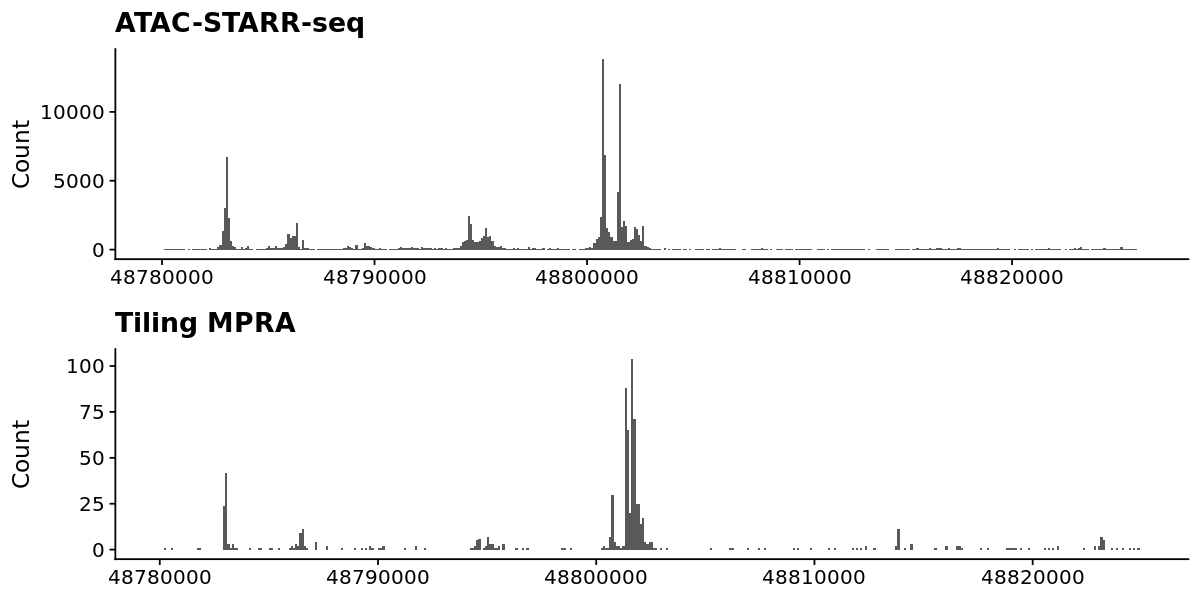

In [7]:
options(repr.plot.height=5, repr.plot.width=10)
plot_grid(
    gp1,# + ylim(0, 3000), 
    gp2,# + ylim(0, 10), 
    align="v", 
    nrow=2, 
    ncol=1)

In [8]:
df1 = dat_astarr
df1 = df1 %>% select(starts_with("Mtf_"))
head(df1)

Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,⋯,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.0000,9.784,0,10.0911,10.2331,0.00000,0,0,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
0,22.3228,9.784,0,34.9201,41.6540,7.49225,0,0,8.4706,⋯,0,0,0,0,0,0,0,0,0,0
0,22.3228,9.784,0,34.9201,41.6540,7.49225,0,0,8.4706,⋯,0,0,0,0,0,0,0,0,0,0
0,22.3228,9.784,0,34.9201,41.6540,7.49225,0,0,8.4706,⋯,0,0,0,0,0,0,0,0,0,0
0,22.3228,9.784,0,34.9201,41.6540,7.49225,0,0,8.4706,⋯,0,0,0,0,0,0,0,0,0,0
0,22.3228,9.784,0,34.9201,41.6540,7.49225,0,0,8.4706,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 = dat_tmpra
df2 = df2 %>% select(starts_with("Mtf_"))
head(df2)

Mtf_GRHL,Mtf_Ebox/CAGCTG,Mtf_ZNF24,Mtf_HD/2,Mtf_HD/9,Mtf_SMARCA5,Mtf_NFAC/2,Mtf_ZNF354,Mtf_ETS/2,Mtf_ZNF140,⋯,Mtf_CREB/ATF/3,Mtf_ZNF435,Mtf_HD/19,Mtf_MYB/1,Mtf_ZBED1,Mtf_ARI5B,Mtf_HINFP1/2,Mtf_MYB/4,Mtf_GMEB2/1,Mtf_HINFP1/3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.9452,8.7102,6.3645,8.1112,7.7946,7.5413,9.4055,15.0817,15.8259,6.9143,⋯,0,0,0,0,0,0,0,0,0,0
0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.4285,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
0.0000,7.6218,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
0.0000,17.4079,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
0.0000,17.4079,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0


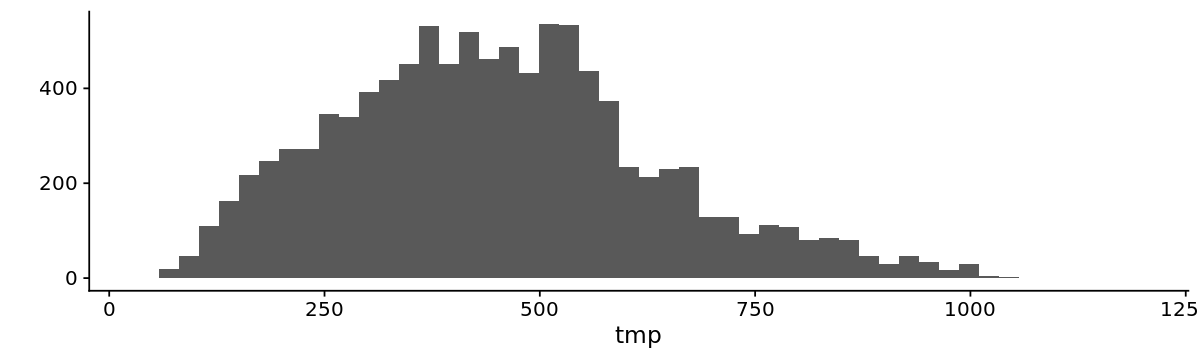

In [10]:
tmp = apply(df2, 1, sum)

options(repr.plot.height=3, repr.plot.width=10)
qplot(tmp, bins = 50) + theme_cowplot()

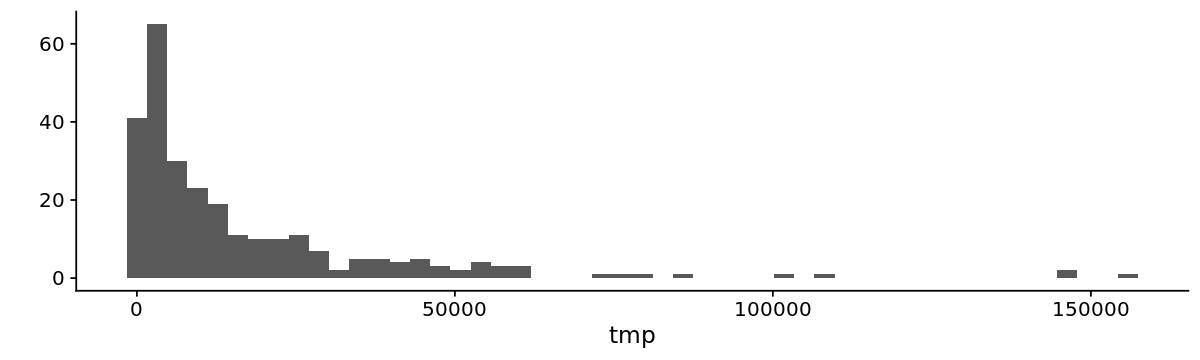

In [11]:
tmp = apply(df2, 2, sum)

options(repr.plot.height=3, repr.plot.width=10)
qplot(tmp, bins = 50) + theme_cowplot()

In [12]:
library(pheatmap)

[1] 10000   270


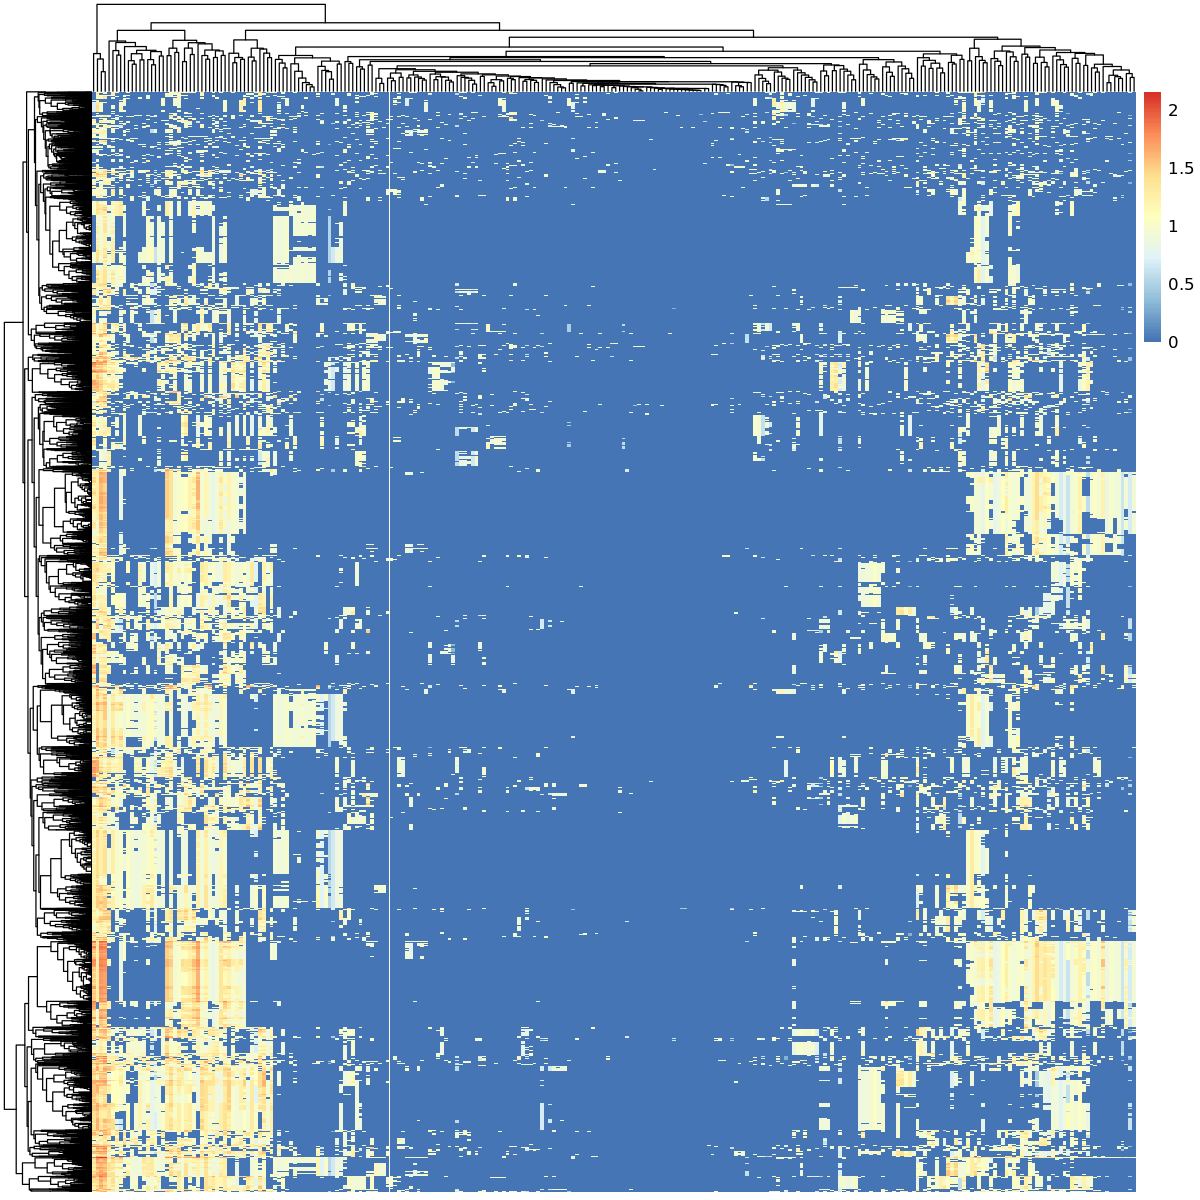

In [21]:
options(repr.plot.height=10, repr.plot.width=10)
set.seed(123)
mat = df1 %>% sample_n(10000)
print(dim(mat))
pheatmap(log10(mat+1), show_rownames = FALSE, show_colnames = FALSE)

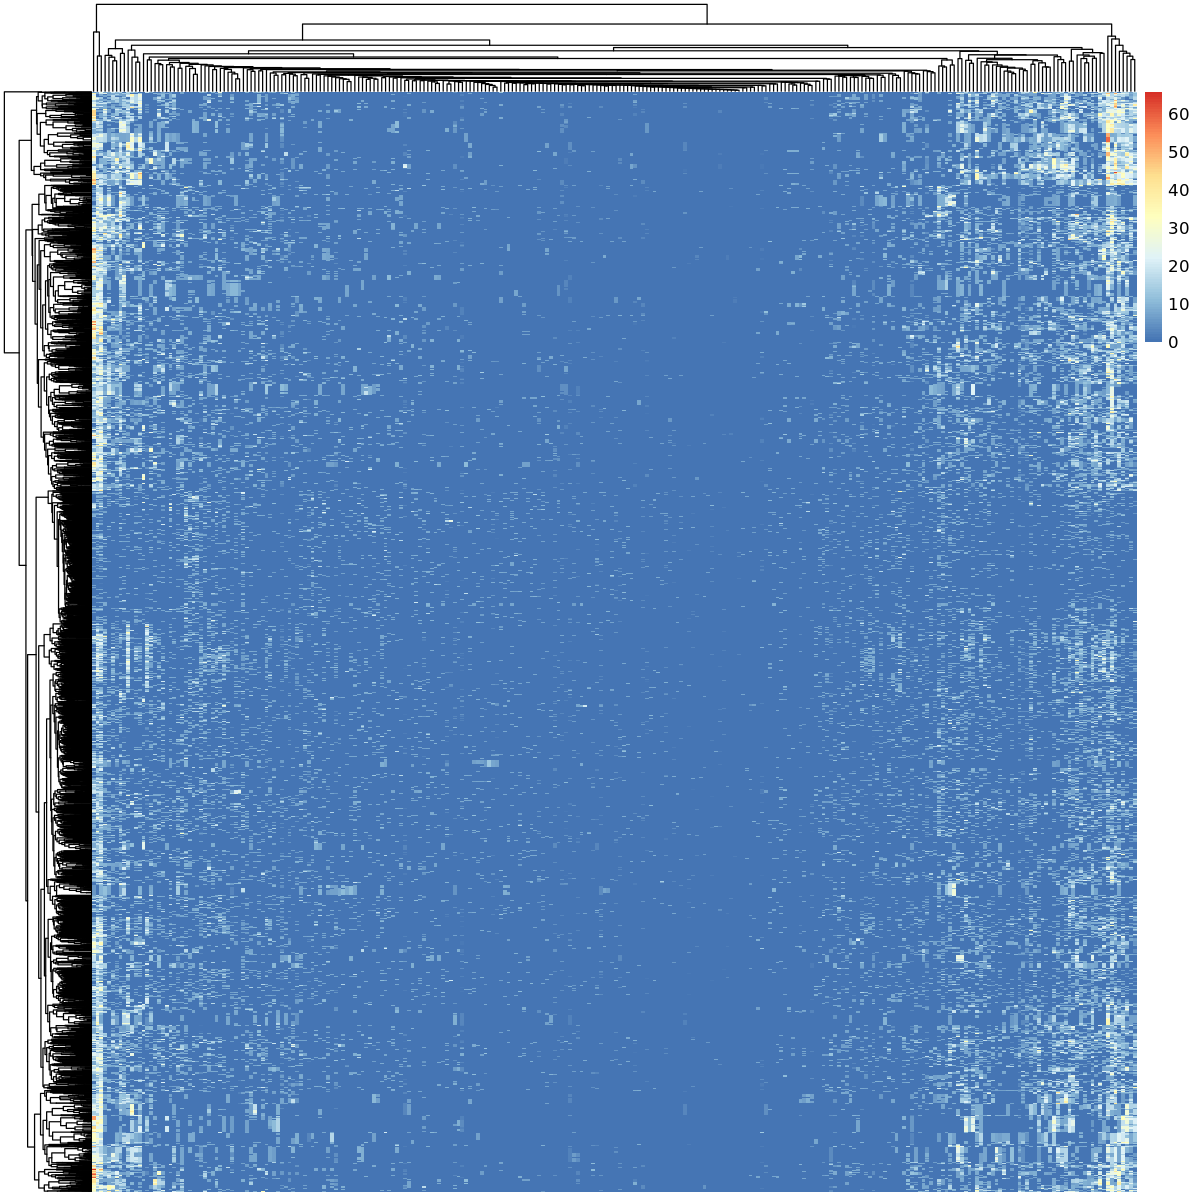

In [15]:
options(repr.plot.height=10, repr.plot.width=10)
mat = df2
pheatmap(mat, show_rownames = FALSE, show_colnames = FALSE)

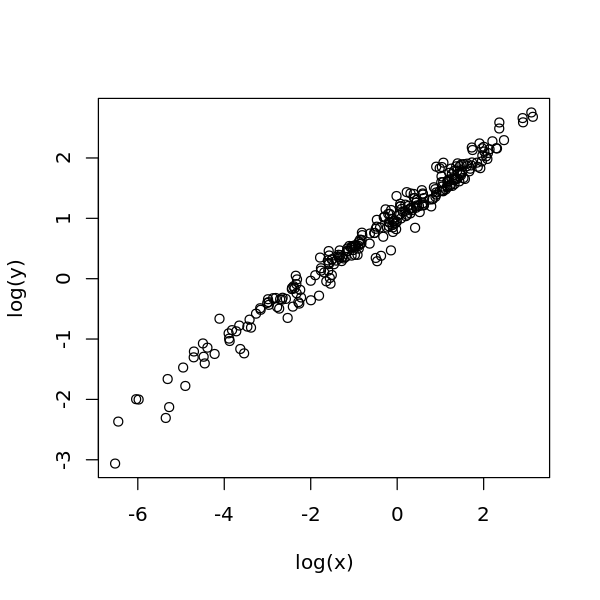

In [52]:
dat = df1
x = apply(dat, 2, mean)
y = apply(dat, 2, sd)

options(repr.plot.height=5, repr.plot.width=5)
plot(log(x), log(y))

In [67]:
dat = df1
x   = apply(dat, 2, mean)
j   = order(x)
#i   = i / max(i)
#i   = i[i > 0.9]

x   = apply(dat, 1, mean)
i   = order(x)
#i   = i / max(i)
#i   = i[i > 0.9]


dat = dat[i, j]

In [54]:
sum(idx)

[1] 27

In [55]:
options(repr.plot.height=10, repr.plot.width=10)
mat = dat
pheatmap(mat, show_rownames = FALSE, show_colnames = FALSE)

ERROR: Error: cannot allocate vector of size 53.6 Gb


In [68]:
dat$Fragment = 1:nrow(dat)
head(dat)

Mtf_HD/3,Mtf_HINFP1/2,Mtf_HOMEZ,Mtf_FOX/2,Mtf_SOX/8,Mtf_SOX/7,Mtf_ZNF435,Mtf_HSFY2,Mtf_ZNF232,Mtf_HD/17,⋯,Mtf_ZIC/2,Mtf_CTCF,Mtf_E2F/2,Mtf_EGR,Mtf_ETS/2,Mtf_KLF/SP/1,Mtf_NR/3,Mtf_GC-tract,Mtf_KLF/SP/2,Fragment
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,5
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,6


In [69]:
tmp = dat %>% gather(Motif, Score, -Fragment)
dim(tmp)

[1] 32400000        3

In [ ]:
gpt = ggplot(tmp, aes(x=Motif, y=Fragment, fill = Score)) + geom_tile() + theme_bw()
print(gpt)